In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold
import pickle

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
def result_for_train_data(y_train,y_train_pred):
    
    print('Training set evaluation result :\n')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    
    print("Accuracy: ", accuracy_train*100)
    print("Precision: ", precision_train*100)
    print("Recall: ", recall_train*100)
    print("F1 Score: ", f1_train*100)
    print("roc_auc_score: ", roc_auc_score_train*100)

In [3]:
def result_for_test_data(y_test,y_test_pred):
    
    print('Test set evaluation result :\n')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    
    print("Accuracy: ", accuracy_test*100)
    print("Precision: ", precision_test*100)
    print("Recall: ", recall_test*100)
    print("F1 Score: ", f1_test*100)
    print("roc_auc_score: ", roc_auc_score_test*100)

In [4]:
def cross_val(model, x, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

    # View the results
    print("Cross-Validation Scores:", scores*100,'%')
    print("Mean Accuracy:", scores.mean()*100,'%')



In [5]:
def plot_roc_curve(y_test, y_pred,y_pred_prob):
    
    y_test = np.array(y_test).ravel()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    
    auc = roc_auc_score(y_test, y_pred_prob)
     
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
   
    plt.show()

In [6]:
!pip install xgboost

In [7]:
df = pd.read_csv('income_evaluation.csv')

# EXPLORATORY DATA ANALYSIS

In [8]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
print(f'The shape of the dataset is :{df.shape}')

The shape of the dataset is :(32561, 15)


In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
missing_val = (df == ' ?').sum()

# Replace '?' with NaN (Not a Number)
df.replace(' ?', np.nan, inplace=True)

print("Missing values in data:")
print(missing_val[missing_val > 0])

Missing values in data:
 workclass         1836
 occupation        1843
 native-country     583
dtype: int64


In [13]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [14]:
# Identify the Categorical and Numerical Columns
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

print('There are {} categorical variables'.format(len(cat_cols)))
print(cat_cols)

There are 9 categorical variables
[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [15]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
print('There are {} numerical features'.format(len(num_cols)))
print(num_cols)


There are 6 numerical features
['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


In [16]:
print("Number of duplicate rows before removal: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after removal: ", df.duplicated().sum())

Number of duplicate rows before removal:  24
Number of duplicate rows after removal:  0


# Outlier detection and removal


Before removing Outliers


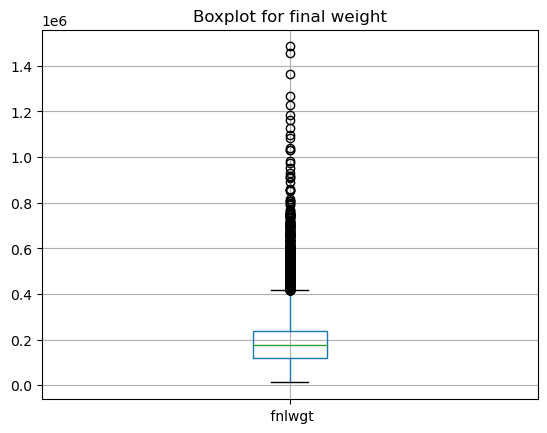

In [17]:

print("Before removing Outliers")
df.boxplot(column=' fnlwgt')
plt.title("Boxplot for final weight")
plt.show()

After removing Outliers


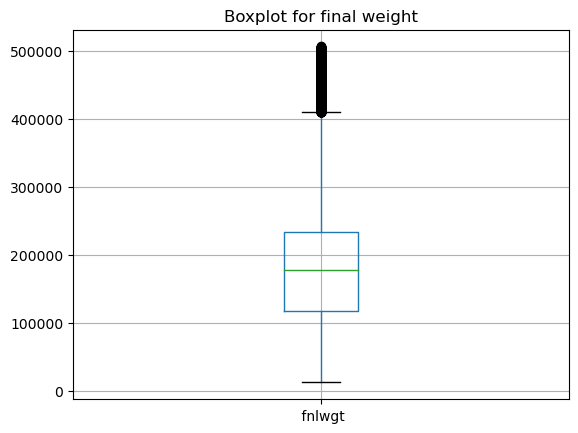

In [18]:
#Removing Outliers using Z-score
z_scores = np.abs(stats.zscore(df[' fnlwgt']))
df = df[(z_scores < 3)]  
print("After removing Outliers")
df.boxplot(column=' fnlwgt')
plt.title("Boxplot for final weight")
plt.show()

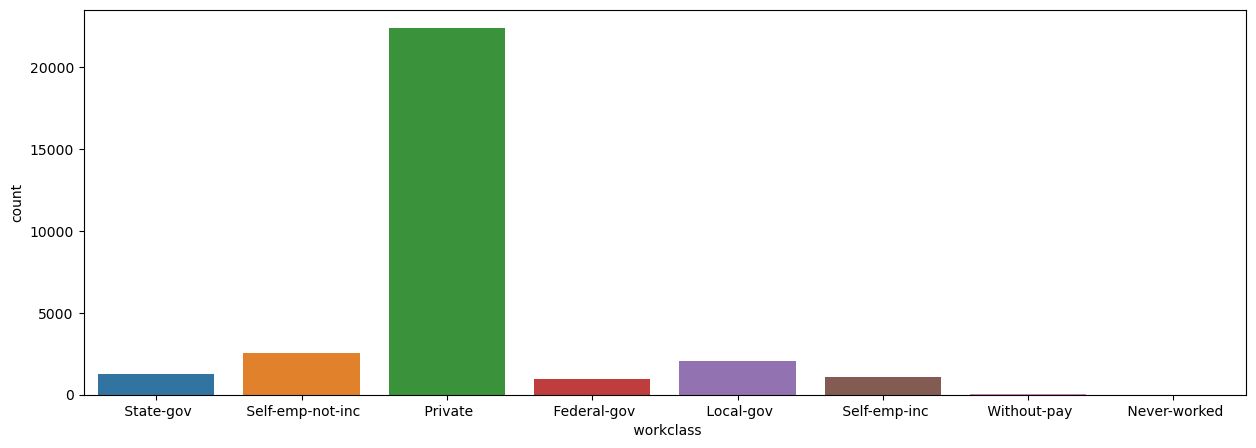

In [19]:
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.countplot(data=df, x=' workclass', ax=ax)
plt.show()

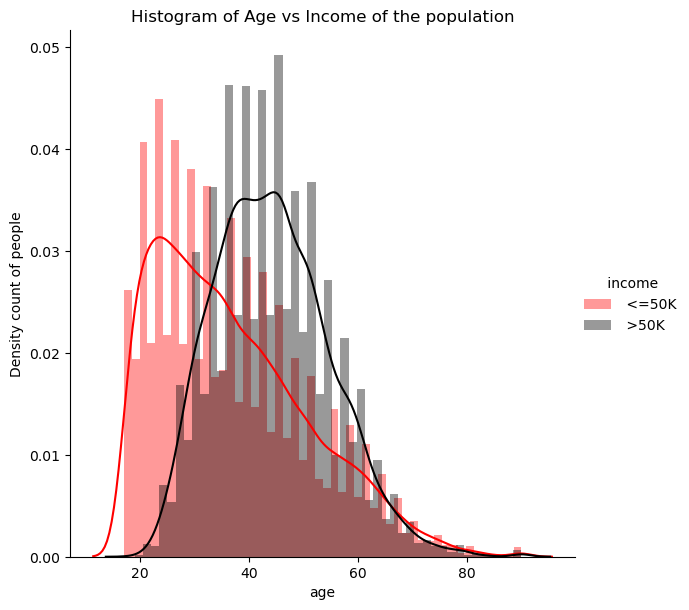

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(df, hue=' income', height=6, palette=["red", "black"]) \
    .map(sns.distplot, 'age') \
    .add_legend() \
    .set(ylabel='Density count of people')
plt.title("Histogram of Age vs Income of the population")
plt.show()


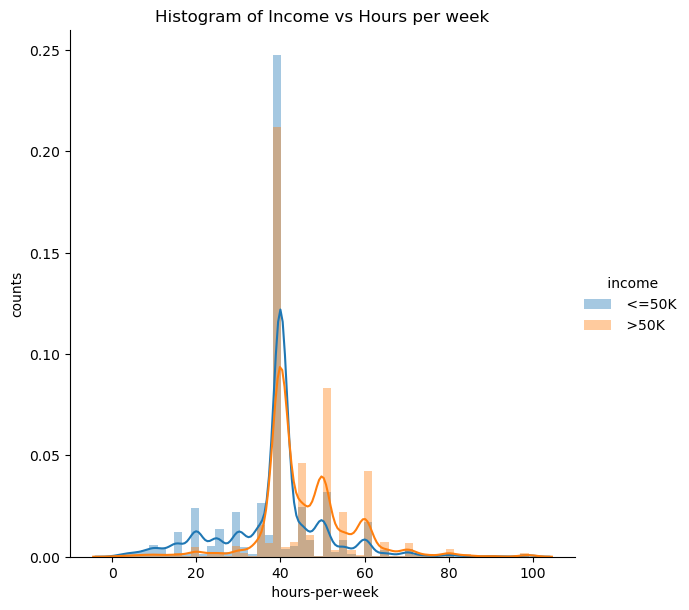

In [21]:
sns.FacetGrid(df,hue=' income',height=6) \
    .map(sns.distplot,' hours-per-week') \
    .add_legend() \
    .set(ylabel='counts')
plt.title("Histogram of Income vs Hours per week")
plt.show()

### Observation: Most people work 40 hours per week. People working more than 40 hours per week probable to have high income.





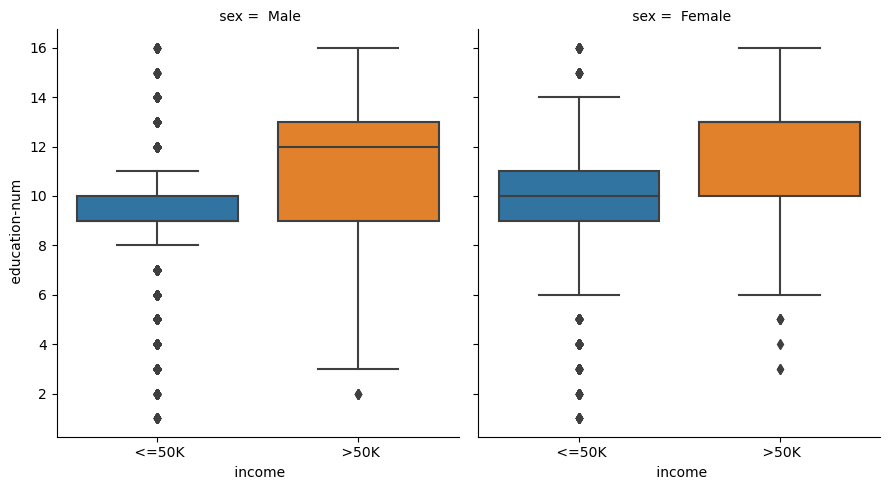

In [22]:
seaborn_facetgrid_object = sns.catplot(
    x=' income',
    y=' education-num',
    col=' sex',
    aspect=0.9,
    dodge=False,
    kind='box',
    data=df
)

seaborn_facetgrid_object


In [23]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:

num_imputer = SimpleImputer(strategy='median')

cat_imputer = SimpleImputer(strategy='most_frequent')


df[num_cols] = num_imputer.fit_transform(df[num_cols])


df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print(df)

        age          workclass    fnlwgt    education   education-num  \
0      39.0          State-gov   77516.0    Bachelors            13.0   
1      50.0   Self-emp-not-inc   83311.0    Bachelors            13.0   
2      38.0            Private  215646.0      HS-grad             9.0   
3      53.0            Private  234721.0         11th             7.0   
4      28.0            Private  338409.0    Bachelors            13.0   
...     ...                ...       ...          ...             ...   
32556  27.0            Private  257302.0   Assoc-acdm            12.0   
32557  40.0            Private  154374.0      HS-grad             9.0   
32558  58.0            Private  151910.0      HS-grad             9.0   
32559  22.0            Private  201490.0      HS-grad             9.0   
32560  52.0       Self-emp-inc  287927.0      HS-grad             9.0   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   

In [25]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [26]:
for column_name in cat_cols:
    unique_values = df[column_name].unique()
    print(f"Unique values in {column_name}: {unique_values}\n")


Unique values in  workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in  education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in  marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']

Unique values in  occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values in  relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values in  race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-In

In [27]:
lb_make = LabelEncoder()

In [67]:






from sklearn.preprocessing import LabelEncoder


for i in df.columns:
     
    if df[i].dtype == object or df[i].dtype == bool:
        
        lb_make = LabelEncoder()
        
        df[i] = lb_make.fit_transform(df[i])








with open('lb_make.pkl', 'wb') as le_file:
    pickle.dump(lb_make, le_file)


In [68]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,6,77516.0,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50.0,5,83311.0,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38.0,3,215646.0,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53.0,3,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28.0,3,338409.0,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302.0,7,12.0,2,12,5,4,0,0.0,0.0,38.0,38,0
32557,40.0,3,154374.0,11,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
32558,58.0,3,151910.0,11,9.0,6,0,4,4,0,0.0,0.0,40.0,38,0
32559,22.0,3,201490.0,11,9.0,4,0,3,4,1,0.0,0.0,20.0,38,0


In [30]:
Xc = df.drop(' income', axis=1)
yc = df[' income']

# Splitting to training and testing
xc_train, xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [31]:
clf = RandomForestClassifier()
clf.fit(xc_train, yc_train)



print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,15.227051
1,workclass,3.807700
2,fnlwgt,17.061903
3,education,3.283131
4,education-num,9.539221
5,marital-status,6.540378
6,occupation,6.663868
7,relationship,10.481147
8,race,1.449974
9,sex,1.296135


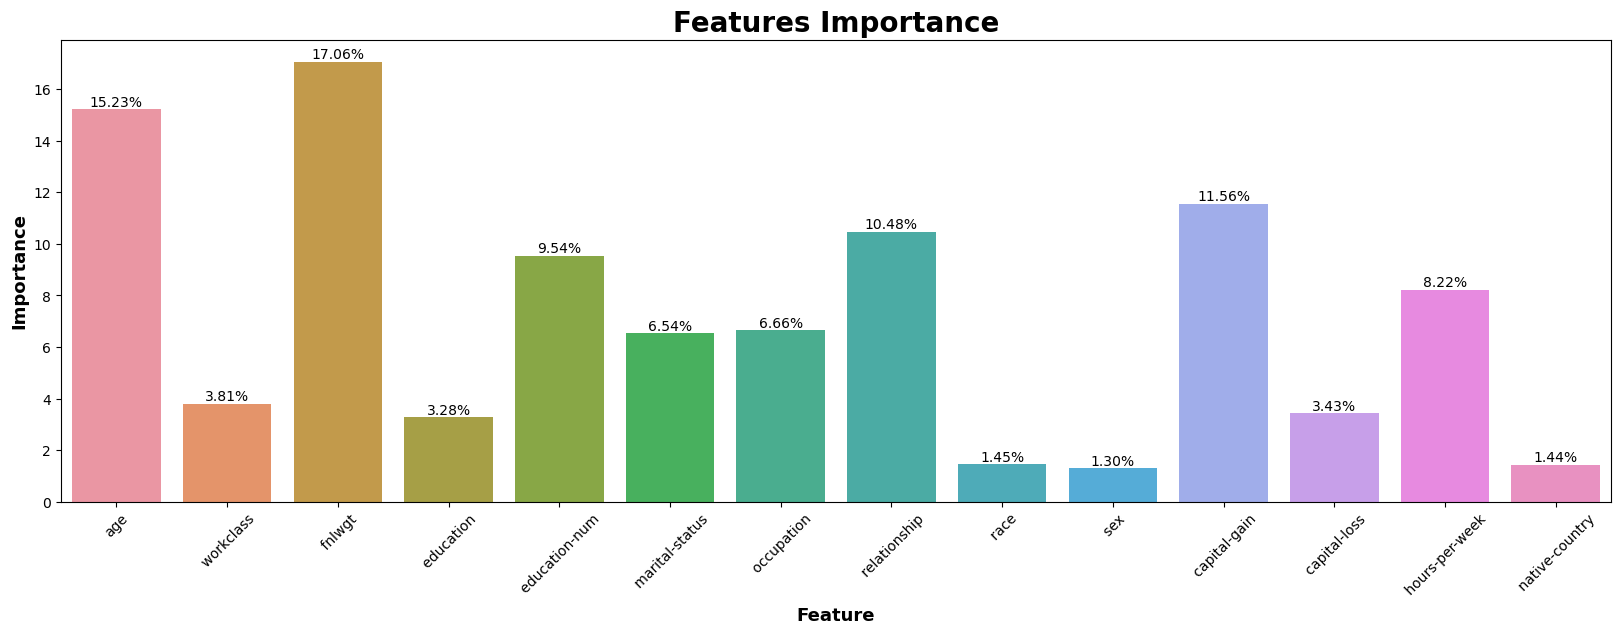

In [32]:
plt.figure(figsize=[20,6])
ax = sns.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance', weight='bold', fontsize=13)
plt.xticks(rotation=45)

# Add percentage annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()


#### We plan to drop the features that have less than 3% impartance, to speed up the process of fitting the model. Since without them, it would provide the same results of the evaluation.




In [33]:
df1 =df.copy()

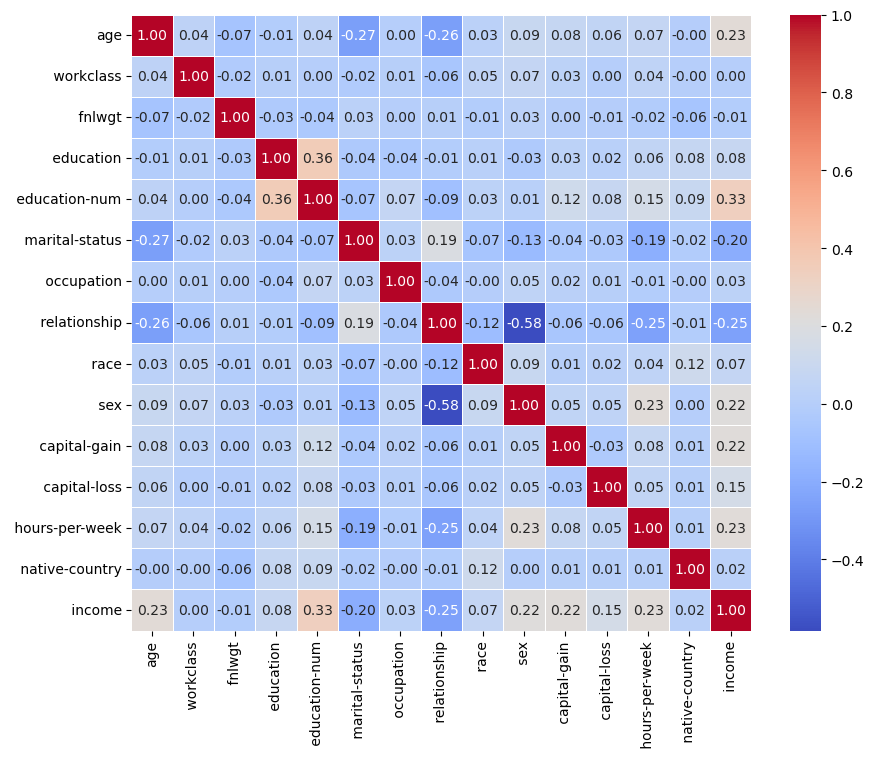

In [34]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)

plt.show()

In [35]:
df1.drop([' race', ' sex', ' native-country'], axis=1, inplace=True)

In [36]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,39.0,6,77516.0,9,13.0,4,0,1,2174.0,0.0,40.0,0
1,50.0,5,83311.0,9,13.0,2,3,0,0.0,0.0,13.0,0
2,38.0,3,215646.0,11,9.0,0,5,1,0.0,0.0,40.0,0
3,53.0,3,234721.0,1,7.0,2,5,0,0.0,0.0,40.0,0
4,28.0,3,338409.0,9,13.0,2,9,5,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302.0,7,12.0,2,12,5,0.0,0.0,38.0,0
32557,40.0,3,154374.0,11,9.0,2,6,0,0.0,0.0,40.0,1
32558,58.0,3,151910.0,11,9.0,6,0,4,0.0,0.0,40.0,0
32559,22.0,3,201490.0,11,9.0,4,0,3,0.0,0.0,20.0,0


In [37]:
scale_col = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' capital-gain',
       ' capital-loss', ' hours-per-week']

scaler = StandardScaler()
for i in scale_col:
    # Reshape the column to a 2D array
    col_data = df1[i].values.reshape(-1, 1)
    # Fit and transform the column
    df1[i] = scaler.fit_transform(col_data)

In [38]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,0.027924,2.620525,-1.137404,-0.336549,1.134150,0.922610,-1.546345,-0.277403,0.147772,-0.217186,-0.035981,0
1,0.833857,1.718230,-1.076125,-0.336549,1.134150,-0.405138,-0.791043,-0.899606,-0.145941,-0.217186,-2.221245,0
2,-0.045342,-0.086359,0.323245,0.180654,-0.422655,-1.732887,-0.287509,-0.277403,-0.145941,-0.217186,-0.035981,0
3,1.053657,-0.086359,0.524953,-2.405362,-1.201058,-0.405138,-0.287509,-0.899606,-0.145941,-0.217186,-0.035981,0
4,-0.778009,-0.086359,1.621396,-0.336549,1.134150,-0.405138,0.719559,2.211413,-0.145941,-0.217186,-0.035981,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.851275,-0.086359,0.763734,-0.853752,0.744949,-0.405138,1.474860,2.211413,-0.145941,-0.217186,-0.197853,0
32557,0.101191,-0.086359,-0.324673,0.180654,-0.422655,-0.405138,-0.035742,-0.899606,-0.145941,-0.217186,-0.035981,1
32558,1.419990,-0.086359,-0.350728,0.180654,-0.422655,2.250358,-1.546345,1.589209,-0.145941,-0.217186,-0.035981,0
32559,-1.217608,-0.086359,0.173553,0.180654,-0.422655,0.922610,-1.546345,0.967005,-0.145941,-0.217186,-1.654695,0


In [39]:
x = df1.drop(' income',axis=1)
y = df1[[' income']]


In [40]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=100)

In [41]:
print(f'Shape of X_train : {x_train.shape}')
print(f'Shape of X_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (22533, 11)
Shape of X_test : (9658, 11)
Shape of y_train : (22533, 1)
Shape of y_test : (9658, 1)


In [42]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
23587,0.101191,-0.086359,0.027752,1.215060,-0.033454,0.922610,-0.791043,-0.277403,-0.145941,-0.217186,0.773376
30529,-0.118609,1.718230,0.920109,1.215060,-0.033454,-0.405138,-1.546345,2.211413,-0.145941,-0.217186,-1.654695
12512,0.540791,-0.086359,-1.057112,1.215060,-0.033454,-0.405138,-0.035742,-0.899606,-0.145941,3.812336,-0.035981
24443,0.540791,-0.086359,-0.758056,0.439256,1.523351,-0.405138,-1.546345,-0.899606,-0.145941,4.089552,1.582733
4000,1.786323,-0.086359,-0.142147,-0.336549,1.134150,-0.405138,1.223093,-0.899606,-0.145941,-0.217186,-0.035981


In [43]:
y_train.head()

,income
23587,1
30529,0
12512,0
24443,0
4000,0


# LOGISTIC REGRESSION

In [44]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(x_train)
y_test_pred_lr = model_lr.predict(x_test)
y_pred_prob_lr = model_lr.predict_proba(x_test)

y_pred_prob_lr = y_pred_prob_lr[:, 1]


LogisticRegression()


In [45]:
result_for_train_data(y_train,y_train_pred_lr)

Training set evaluation result :

Accuracy:  82.35920649713752
Precision:  71.88995215311004
Recall:  44.199301342158485
F1 Score:  54.74211545030172
roc_auc_score:  69.35014792157648


In [46]:
result_for_test_data(y_test,y_test_pred_lr)

Test set evaluation result :

Accuracy:  81.96313936632843
Precision:  70.35211267605634
Recall:  43.060344827586206
F1 Score:  53.42245989304813
roc_auc_score:  68.66154335955488


In [47]:
cross_val(model_lr,x,y)

Cross-Validation Scores: [81.84500699 82.44796521 82.0285803  82.32370301 82.52562908] %
Mean Accuracy: 82.23417691808048 %


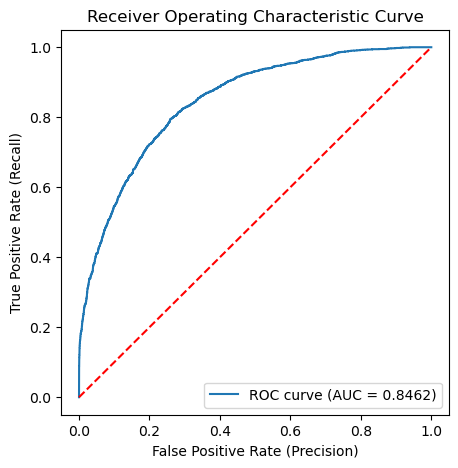

In [48]:
plot_roc_curve(y_test, y_test_pred_lr,y_pred_prob_lr)

#### Hyperparameter tuning

In [49]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
lr_best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", lr_best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8233698903643599


# NAIVE BAYES 

In [50]:
model_nb = GaussianNB()  
model_nb.fit(x_train, y_train)
print(model_nb)

y_train_pred_nb = model_nb.predict(x_train)
y_test_pred_nb = model_nb.predict(x_test)
y_pred_prob_nb = model_nb.predict_proba(x_test)

y_pred_prob_nb = y_pred_prob_nb[:, 1]

GaussianNB()


In [51]:
result_for_train_data(y_train,y_train_pred_nb)

Training set evaluation result :

Accuracy:  80.15355256734567
Precision:  69.2552767821585
Recall:  31.97278911564626
F1 Score:  43.74842767295597
roc_auc_score:  63.72829229972088


In [52]:
result_for_test_data(y_test,y_test_pred_nb)

Test set evaluation result :

Accuracy:  79.86125491820253
Precision:  67.06096451319381
Recall:  31.767241379310345
F1 Score:  43.11202105878912
roc_auc_score:  63.41700853375439


In [53]:
cross_val(model_nb,x,y)

Cross-Validation Scores: [79.5620438  79.79186083 80.30444237 80.58403231 79.8073936 ] %
Mean Accuracy: 80.00995458080784 %


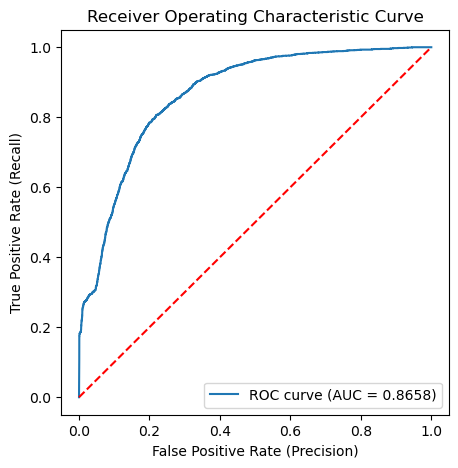

In [54]:
plot_roc_curve(y_test, y_test_pred_nb,y_pred_prob_nb)

### Hyperparameter Tunning

In [55]:
grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GaussianNB()

grid_model = GridSearchCV(estimator=nb, param_grid=grid, cv=10)

grid_model.fit(x_train, y_train)

best_params = grid_model.best_params_
nb_best_score = grid_model.best_score_

print("Best Parameters:", best_params)
print(f"The Accuracy after Tuning: {nb_best_score * 100}")

Best Parameters: {'var_smoothing': 0.0533669923120631}
The Accuracy after Tuning: 80.84139022366314


# RANDOM FOREST

In [58]:
model_rf = RandomForestClassifier(random_state=100)

model_rf.fit(x_train, y_train)
print(model_rf)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)
y_pred_prob_rf = model_rf.predict_proba(x_test)

y_pred_prob_rf = y_pred_prob_rf[:, 1]



# Assuming random_forest is an object you want to serialize
with open('model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)


RandomForestClassifier(random_state=100)


In [59]:
result_for_train_data(y_train,y_train_pred_rf)

Training set evaluation result :

Accuracy:  99.99556206452758
Precision:  100.0
Recall:  99.98161426732855
F1 Score:  99.99080628849867
roc_auc_score:  99.99080713366428


In [60]:
result_for_test_data(y_test,y_test_pred_rf)

Test set evaluation result :

Accuracy:  85.90805549803272
Precision:  74.80600103466115
Recall:  62.327586206896555
F1 Score:  67.99905948742064
roc_auc_score:  77.84545023073092


In [61]:
cross_val(model_rf,x,y)

Cross-Validation Scores: [85.43252058 85.35259397 84.88661075 86.20689655 85.84964275] %
Mean Accuracy: 85.54565291952227 %


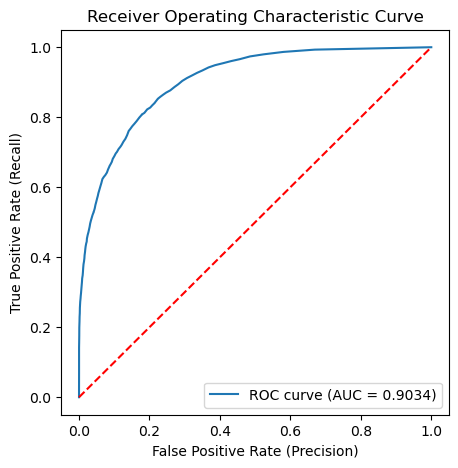

In [63]:
plot_roc_curve(y_test, y_test_pred_rf,y_pred_prob_rf)

### Hyperparameter Tunning 

In [58]:
grid={
    'n_estimators':[100,200],
    'max_depth':[None,5],
    'criterion':['gini','entropy'],
    'max_samples':[0.6,0.8],
    'max_leaf_nodes':[None,5],
    'max_features':['sqrt','log2']
}

rff=RandomForestClassifier(warm_start= True, bootstrap= True, oob_score = True)

grid_model= GridSearchCV(estimator = rff, param_grid = grid, cv = 10)

grid_model.fit(x_train,y_train)

best_params=grid_model.best_params_
rfc_best_score = grid_model.best_score_

print("Best Parameters:", best_params)
print(f"The Accuracy after Tuning : {grid_model.best_score_ * 100}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': 0.6, 'n_estimators': 200}
The Accuracy after Tuning : 85.63880713519703


# XGBOOST MODEL 

In [59]:
model_xgb= XGBClassifier()

model_xgb.fit(x_train, y_train)
print(model_xgb)

y_train_pred_xgb = model_xgb.predict(x_train)
y_test_pred_xgb = model_xgb.predict(x_test)
y_pred_prob_xgb = model_xgb.predict_proba(x_test)

y_pred_prob_xgb = y_pred_prob_xgb[:, 1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [60]:
result_for_train_data(y_train,y_train_pred_xgb)

Training set evaluation result :

Accuracy:  91.07087382949452
Precision:  85.9601259181532
Recall:  75.30796102224674
F1 Score:  80.28224225793805
roc_auc_score:  85.6971535542964


In [61]:
result_for_test_data(y_test,y_test_pred_xgb)

Test set evaluation result :

Accuracy:  86.71567612342099
Precision:  76.01605619668841
Recall:  65.30172413793103
F1 Score:  70.25272432181777
roc_auc_score:  79.39384380785896


In [62]:
cross_val(model_xgb,x,y)

Cross-Validation Scores: [87.21851219 86.93693694 86.70394532 87.18546132 86.85927307] %
Mean Accuracy: 86.98082576849359 %


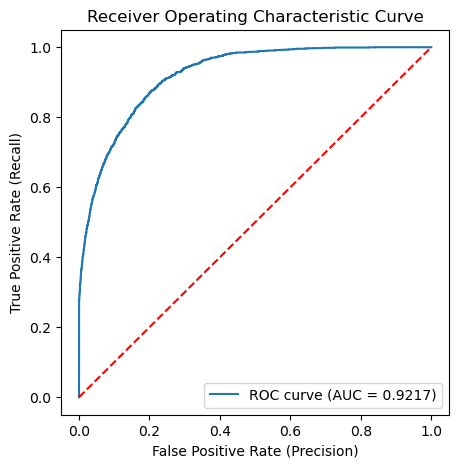

In [63]:
plot_roc_curve(y_test, y_test_pred_xgb,y_pred_prob_xgb)

### Hyperparameter Tunning 

In [64]:
grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.6, 0.8],
    'gamma': [0, 1],
    'min_child_weight': [3, 5]
}

xgb = XGBClassifier()

grid_model = GridSearchCV(estimator=xgb, param_grid=grid, cv=10)

grid_model.fit(x_train, y_train)

best_params = grid_model.best_params_
xgb_best_score = grid_model.best_score_

print("Best Parameters:", best_params)
print(f"The Accuracy after Tuning: {grid_model.best_score_ * 100}")


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
The Accuracy after Tuning: 87.27195642918778


# ADA BOOST

In [65]:
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
print(ada_boost)
ada_boost.fit(x_train, y_train)
y_train_pred_ada = ada_boost.predict(x_train)
y_test_pred_ada = ada_boost.predict(x_test)
y_pred_prob_ada = ada_boost.predict_proba(x_test)

y_pred_prob_ada = y_pred_prob_ada[:, 1]

accuracy_ada = accuracy_score(y_test, y_test_pred_ada)

AdaBoostClassifier(random_state=42)


In [66]:
result_for_train_data(y_train,y_train_pred_ada)

Training set evaluation result :

Accuracy:  85.83854790751343
Precision:  76.23716153127917
Recall:  60.047802904945755
F1 Score:  67.1809112413864
roc_auc_score:  77.0462484748199


In [67]:
result_for_test_data(y_test,y_test_pred_ada)

Test set evaluation result :

Accuracy:  85.92876371919652
Precision:  76.73900946021146
Recall:  59.439655172413794
F1 Score:  66.9905270828273
roc_auc_score:  76.87164006917229


In [68]:
cross_val(ada_boost,x,y)

Cross-Validation Scores: [86.03820469 85.36812675 85.52345449 86.39328984 86.00497049] %
Mean Accuracy: 85.86560925117459 %


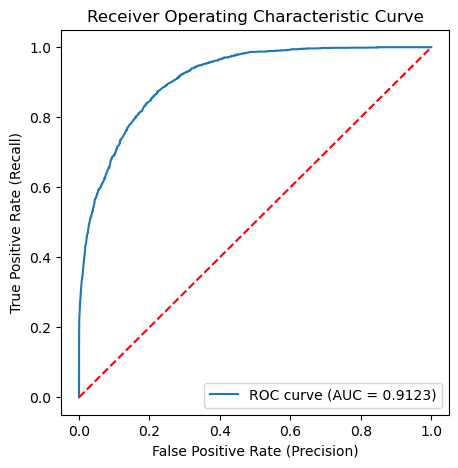

In [69]:
plot_roc_curve(y_test, y_test_pred_xgb,y_pred_prob_ada)

# MODEL PERFORMANCE

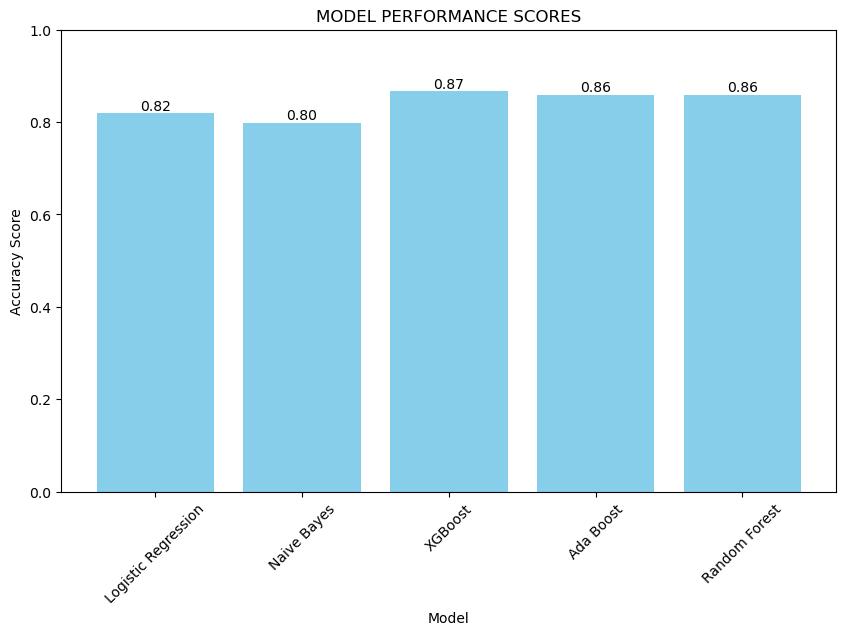

In [70]:
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

model_names = ['Logistic Regression', 'Naive Bayes', 'XGBoost','Ada Boost','Random Forest']
accuracy_scores = [accuracy_lr,accuracy_nb,accuracy_xgb,accuracy_ada,accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('MODEL PERFORMANCE SCORES')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()